### Import the necessary packages.

In [ ]:
!pip install klib

In [3]:
import klib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
import re
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [5]:
train=pd.read_csv("/content/gdrive/MyDrive/kaggle_tabular-playground-series-jan-2022/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/kaggle_tabular-playground-series-jan-2022/test.csv")

### Structure of the train and test dataset.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


#### The above information shows that there are 26298 data entries and 6 columns.

#### The target column is **num_sold**.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   row_id   6570 non-null   int64 
 1   date     6570 non-null   object
 2   country  6570 non-null   object
 3   store    6570 non-null   object
 4   product  6570 non-null   object
dtypes: int64(1), object(4)
memory usage: 256.8+ KB


#### The above information shows that there are 6570 data entries and 5 columns.

#### Let's see is there any missing values in train and test dataset by column wise.

In [8]:
train.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

#### The above information shows that the train dataset doesn't have any missing values.

In [9]:
test.isnull().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

#### The above information shows that the test dataset doesn't have any missing values.

#### Let's see the glimpse of train dataset

In [10]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


### Let's explore and visualize each column of train dataset.First,let's see the target column(**num_sold**) distribution.

In [40]:
def box_plot(df,col):
  plt.figure(figsize=(8,8))
  bx=sns.boxplot(data=df ,y=col,color="green")
  plt.title(col.capitalize()+" Distribution Boxplot",fontsize=15)
  plt.ylabel(col,fontsize=15)
  plt.yticks(fontsize=15)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


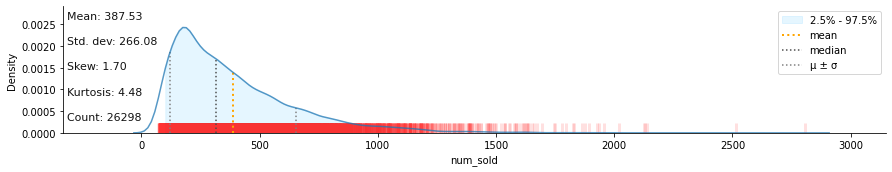

In [11]:
klib.dist_plot(train['num_sold'])

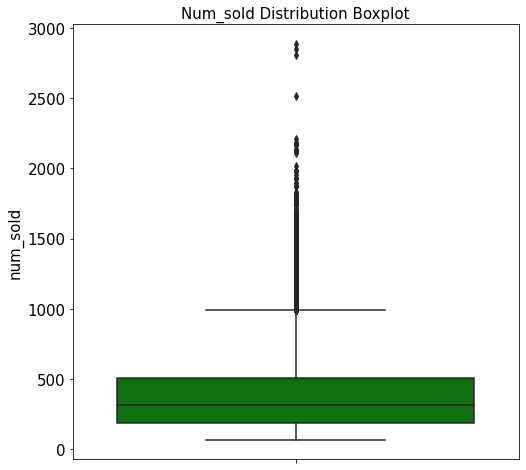

In [41]:
box_plot(train,'num_sold')

In [23]:
train['num_sold'].describe()

count    26298.000000
mean       387.533577
std        266.076193
min         70.000000
25%        190.000000
50%        315.000000
75%        510.000000
max       2884.000000
Name: num_sold, dtype: float64

#### The above histogram shows that the number_sold column is postively skewed.

#### The boxplot explains there are outliers above the third quartile.

#### The average number of sold items 387.

#### Minimum number of sold item is 70.

#### Maximum number of sold item is 2884.

### Let's see Country column distribution and see how item sales differ in those countries.

In [61]:
def group_wise_box(df,groupcol,value,title=""):
    _=plt.figure(figsize=(10,6))
    _=sns.boxplot(x=df[groupcol],y=df[value])
    _=plt.title(title,fontsize=25)
    _=plt.xlabel(groupcol,fontsize=20)
    _=plt.ylabel(value,fontsize=20)
    _=plt.xticks(fontsize=18)

In [43]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [66]:
def count_plot(df,col,title=""):
  plt.figure(figsize=(10,6))
  _=sns.countplot(x=df[col],order=df[col].value_counts().index)
  _=plt.title(title,fontsize=25)
  _=plt.xlabel(col,fontsize=20)
  _=plt.xticks(fontsize=14)

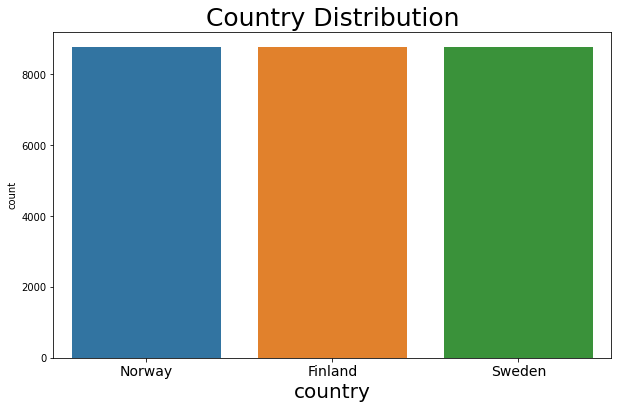

In [67]:
count_plot(train,'country',title="Country Distribution")

In [58]:
train['country'].value_counts()

Norway     8766
Finland    8766
Sweden     8766
Name: country, dtype: int64

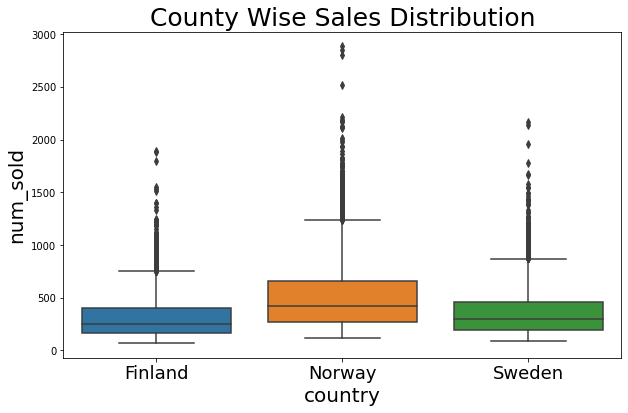

In [62]:
group_wise_box(train,'country','num_sold',title="County Wise Sales Distribution")

In [63]:
group_summary(train,'country','num_sold')

,country,count,mean,std,min,25%,50%,75%,max
1,Norway,8766.0,502.476158,320.297865,114.0,268.0,417.0,656.0,2884.0
2,Sweden,8766.0,354.292151,225.359697,86.0,189.0,297.0,462.0,2169.0
0,Finland,8766.0,305.832421,195.022555,70.0,163.0,254.0,399.0,1895.0


#### The above count plot explains that all country has the same number of sales records.

#### The group by boxplot explains that the number of sold items is low in Finland when compared to Sweden and Norway.


### Let's see Store column distribution and see how item sales differ in those stores.

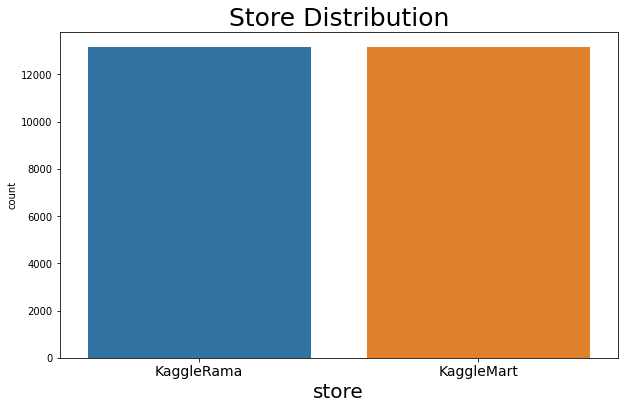

In [68]:
count_plot(train,'store',title="Store Distribution")

In [69]:
train['store'].value_counts()

KaggleRama    13149
KaggleMart    13149
Name: store, dtype: int64

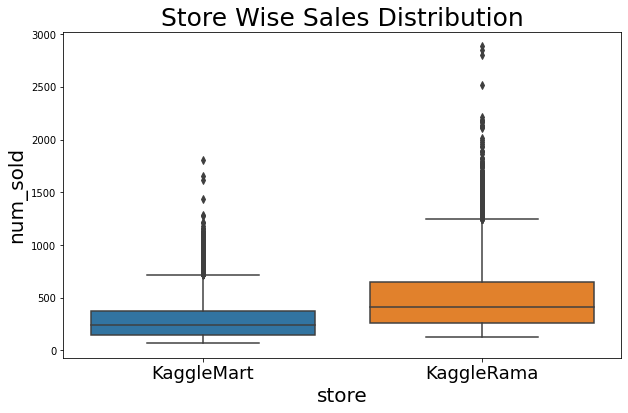

In [71]:
group_wise_box(train,'store','num_sold',title="Store Wise Sales Distribution")

In [73]:
group_summary(train,'store','num_sold')

,store,count,mean,std,min,25%,50%,75%,max
1,KaggleRama,13149.0,492.508176,299.820304,128.0,258.0,415.0,652.0,2884.0
0,KaggleMart,13149.0,282.558978,172.236005,70.0,148.0,238.0,376.0,1809.0


#### The above count plot explains that all store has the same number of sales records.

#### The group by boxplot explains that the number of sold items is low in kagglemart store.

#### There is a high difference in the mean number of sold items between kagglerama and kagglemart stores.


### Let's see product column distribution and see how item sales differ in those products.

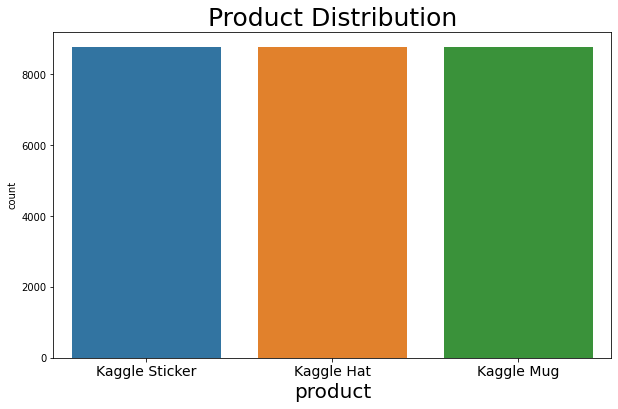

In [74]:
count_plot(train,'product',title="Product Distribution")

In [75]:
train['product'].value_counts()

Kaggle Sticker    8766
Kaggle Hat        8766
Kaggle Mug        8766
Name: product, dtype: int64

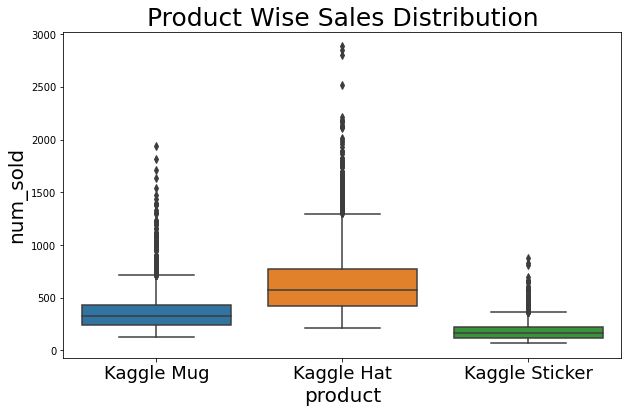

In [76]:
group_wise_box(train,'product','num_sold',title="Product Wise Sales Distribution")

In [77]:
group_summary(train,'product','num_sold')

,product,count,mean,std,min,25%,50%,75%,max
0,Kaggle Hat,8766.0,628.846110,282.545039,210.0,421.0,570.5,771.0,2884.0
1,Kaggle Mug,8766.0,354.356263,156.292396,126.0,237.0,325.0,427.0,1935.0
2,Kaggle Sticker,8766.0,179.398357,74.042618,70.0,121.0,168.0,218.0,874.0


#### The above count plot explains that all product has the same number of sales records.

#### The group by boxplot explains that the kaggle sticker's number of sold items is very low.

#### There is a high difference in the mean number of sold items between product categories.


### Let's create a grouped histogram, boxplot, and see the sales distribution.

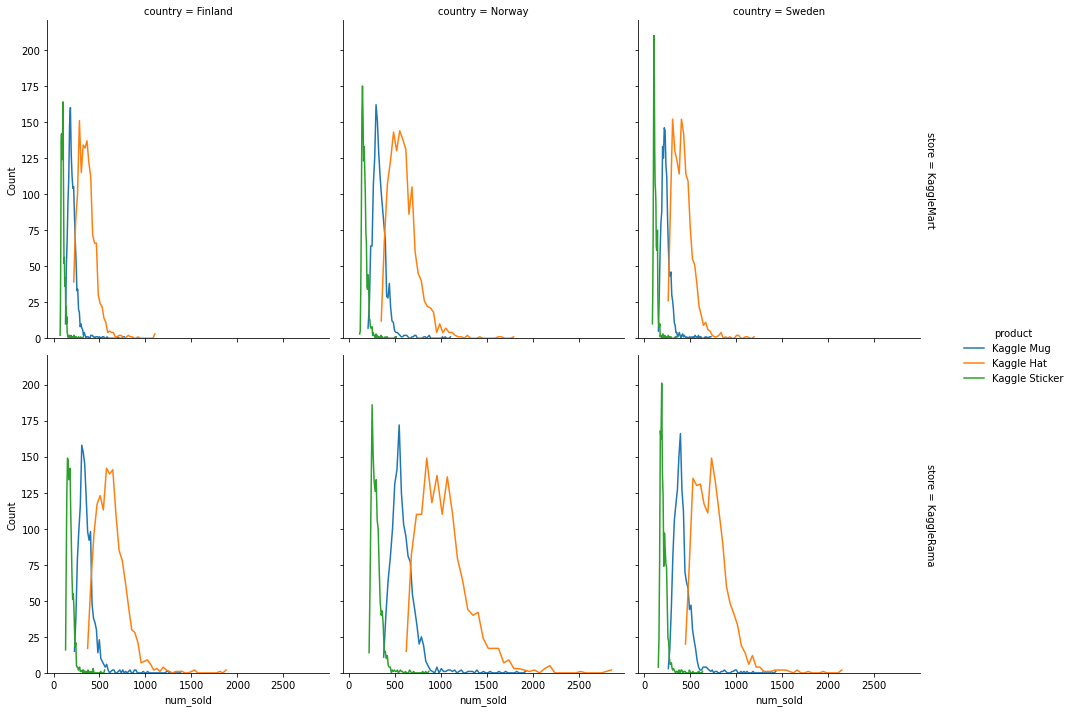

In [124]:
g = sns.FacetGrid(train, col="country", row="store" ,hue='product',margin_titles=True,
                  height=5,aspect=.9,legend_out=True);
g.map_dataframe(sns.histplot,x="num_sold",element="poly",fill=False);
g.add_legend();



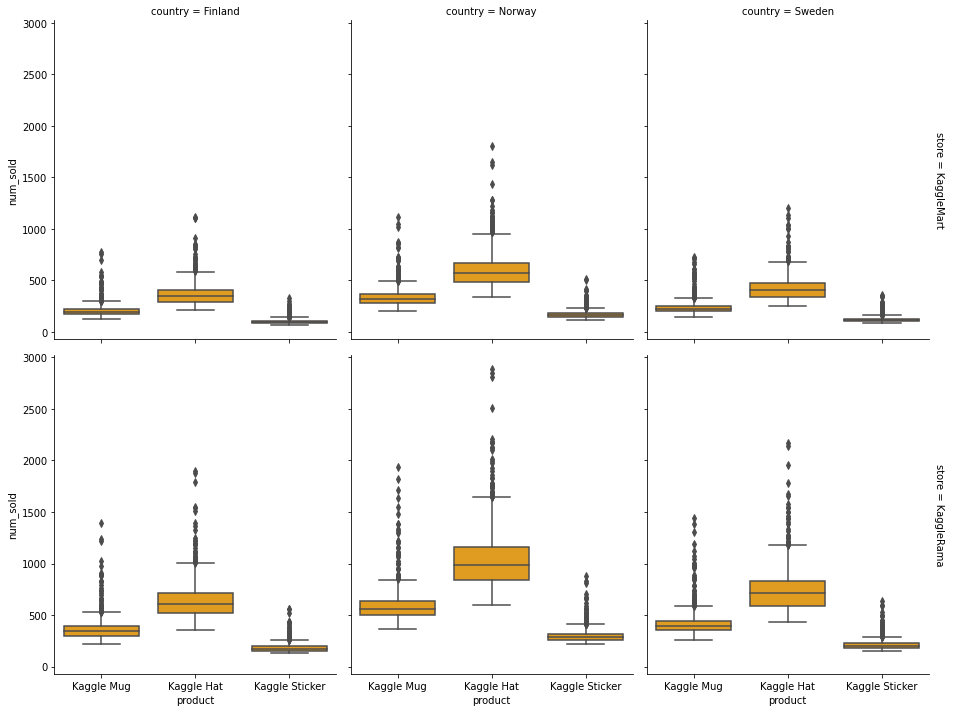

In [110]:
g = sns.FacetGrid(train, col="country", row="store", margin_titles=True,height=5,aspect=.9);
g.map_dataframe(sns.boxplot, x="product", y="num_sold",color='Orange');
g.add_legend();



In [111]:
group_summary(train,['country','store','product'],'num_sold')

,country,store,product,count,mean,std,min,25%,50%,75%,max
9,Norway,KaggleRama,Kaggle Hat,1461.0,1036.357974,276.772979,596.0,841.0,990.0,1163.0,2884.0
15,Sweden,KaggleRama,Kaggle Hat,1461.0,731.452430,189.320490,428.0,591.0,714.0,826.0,2169.0
3,Finland,KaggleRama,Kaggle Hat,1461.0,628.926762,165.582345,354.0,515.0,608.0,712.0,1895.0
6,Norway,KaggleMart,Kaggle Hat,1461.0,594.645448,158.359675,335.0,482.0,571.0,673.0,1809.0
10,Norway,KaggleRama,Kaggle Mug,1461.0,584.297741,142.517751,366.0,500.0,558.0,639.0,1935.0
12,Sweden,KaggleMart,Kaggle Hat,1461.0,419.214237,109.328630,248.0,337.0,408.0,475.0,1207.0
16,Sweden,KaggleRama,Kaggle Mug,1461.0,411.273101,104.620331,253.0,351.0,394.0,445.0,1438.0
0,Finland,KaggleMart,Kaggle Hat,1461.0,362.479808,97.515965,210.0,292.0,350.0,410.0,1113.0
4,Finland,KaggleRama,Kaggle Mug,1461.0,356.110883,94.885403,220.0,301.0,340.0,392.0,1398.0
7,Norway,KaggleMart,Kaggle Mug,1461.0,334.370294,82.256584,201.0,284.0,319.0,367.0,1113.0


#### The above density plot explains that across all countries' stores the kaggle sticker number of sold items is low.

#### The kaggle hat is the most sold item across all countries store.

#### The boxplot explains that there are outliers in all groups.

#### Let's explore the date column and see how the sales changes over the years. 

#### Let's convert the date column to date format.

In [ ]:

train['date'] = pd.to_datetime(train['date'], errors='coerce')

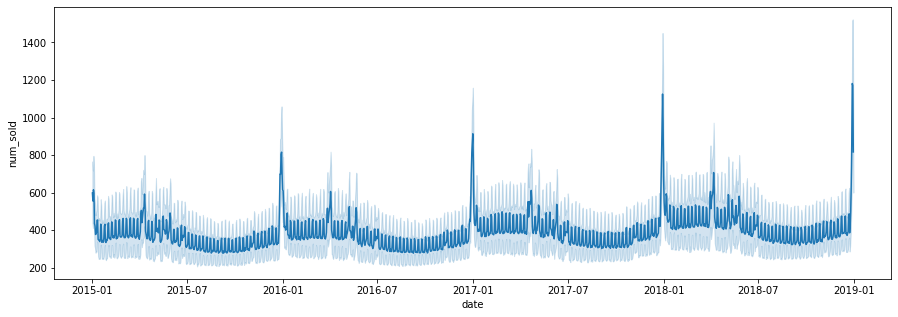

In [125]:
plt.figure(figsize=(15,5))
sns.lineplot(x="date",y="num_sold",
             data=train);

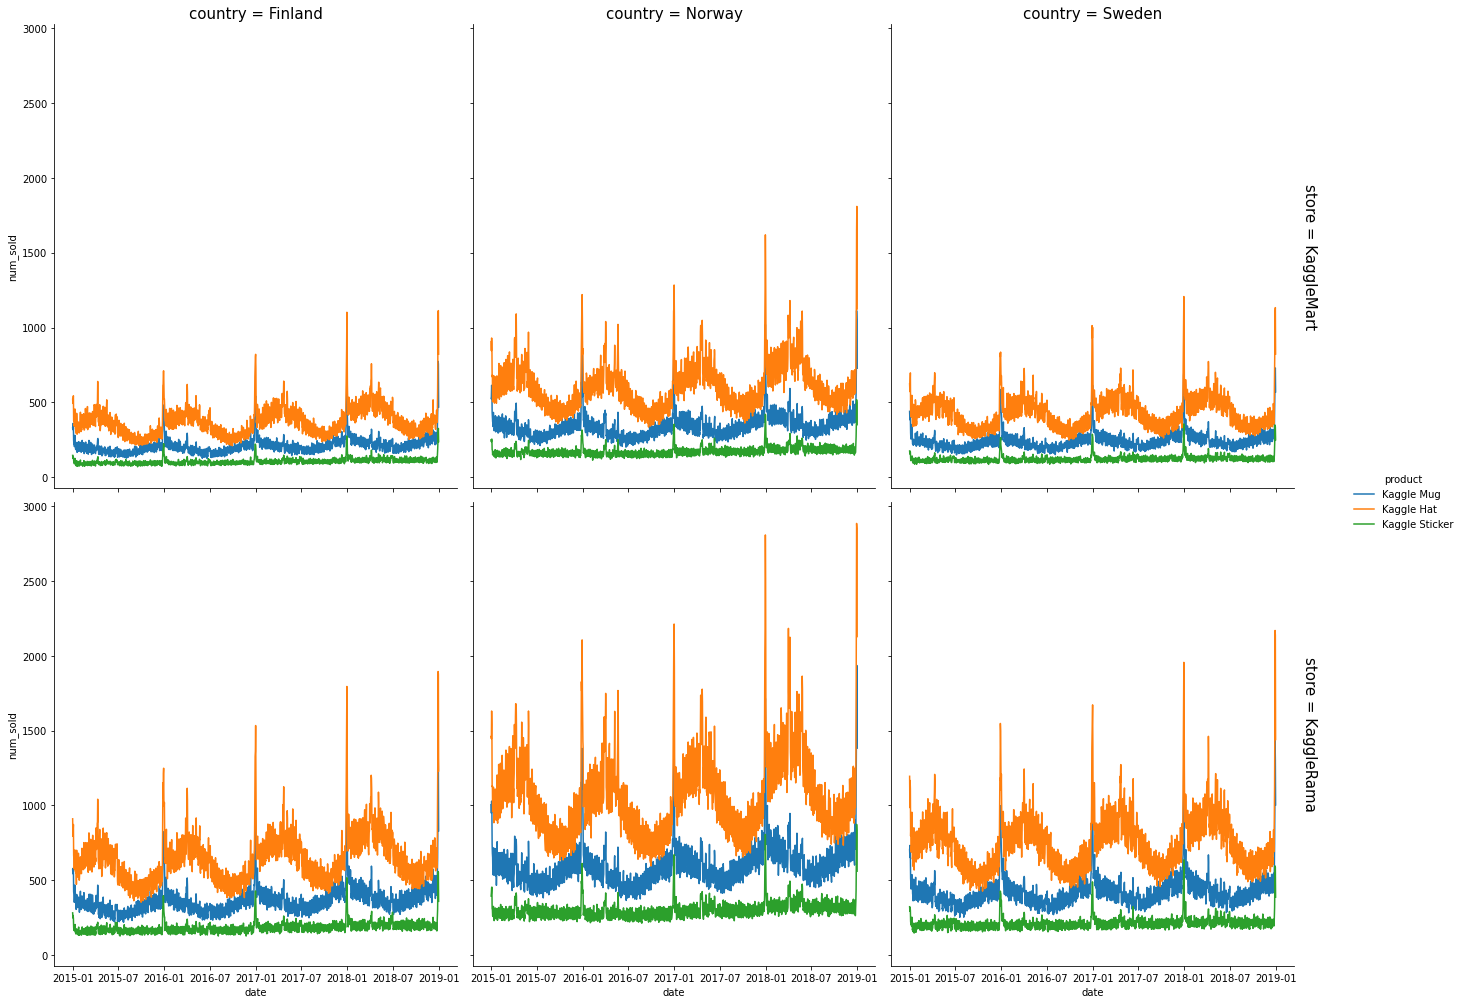

In [131]:
g = sns.FacetGrid(train, col="country", row="store", hue='product',margin_titles=True,height=7,
                  aspect=.9);
g.map_dataframe(sns.lineplot, x="date", y="num_sold");
g.set_titles(size=15);
g.add_legend();



#### The above line plot explains that more number of items sold at end of the year.

### Let's break the date column into the day, month, year, quarter, week format and see how sales are changed.

In [19]:
train['day'],train['day_label'],train['day_number'],train['month_number'],train['month_label'],train['year_quarter'],train['week_of_year'],train['year'] = train['date'].dt.day,train['date'].dt.day_name(), train['date'].dt.dayofweek,train['date'].dt.month,train['date'].dt.strftime('%b'),train['date'].dt.quarter,train['date'].dt.week, train['date'].dt.year

### Let's see how sales are changing over each month of the year and country.

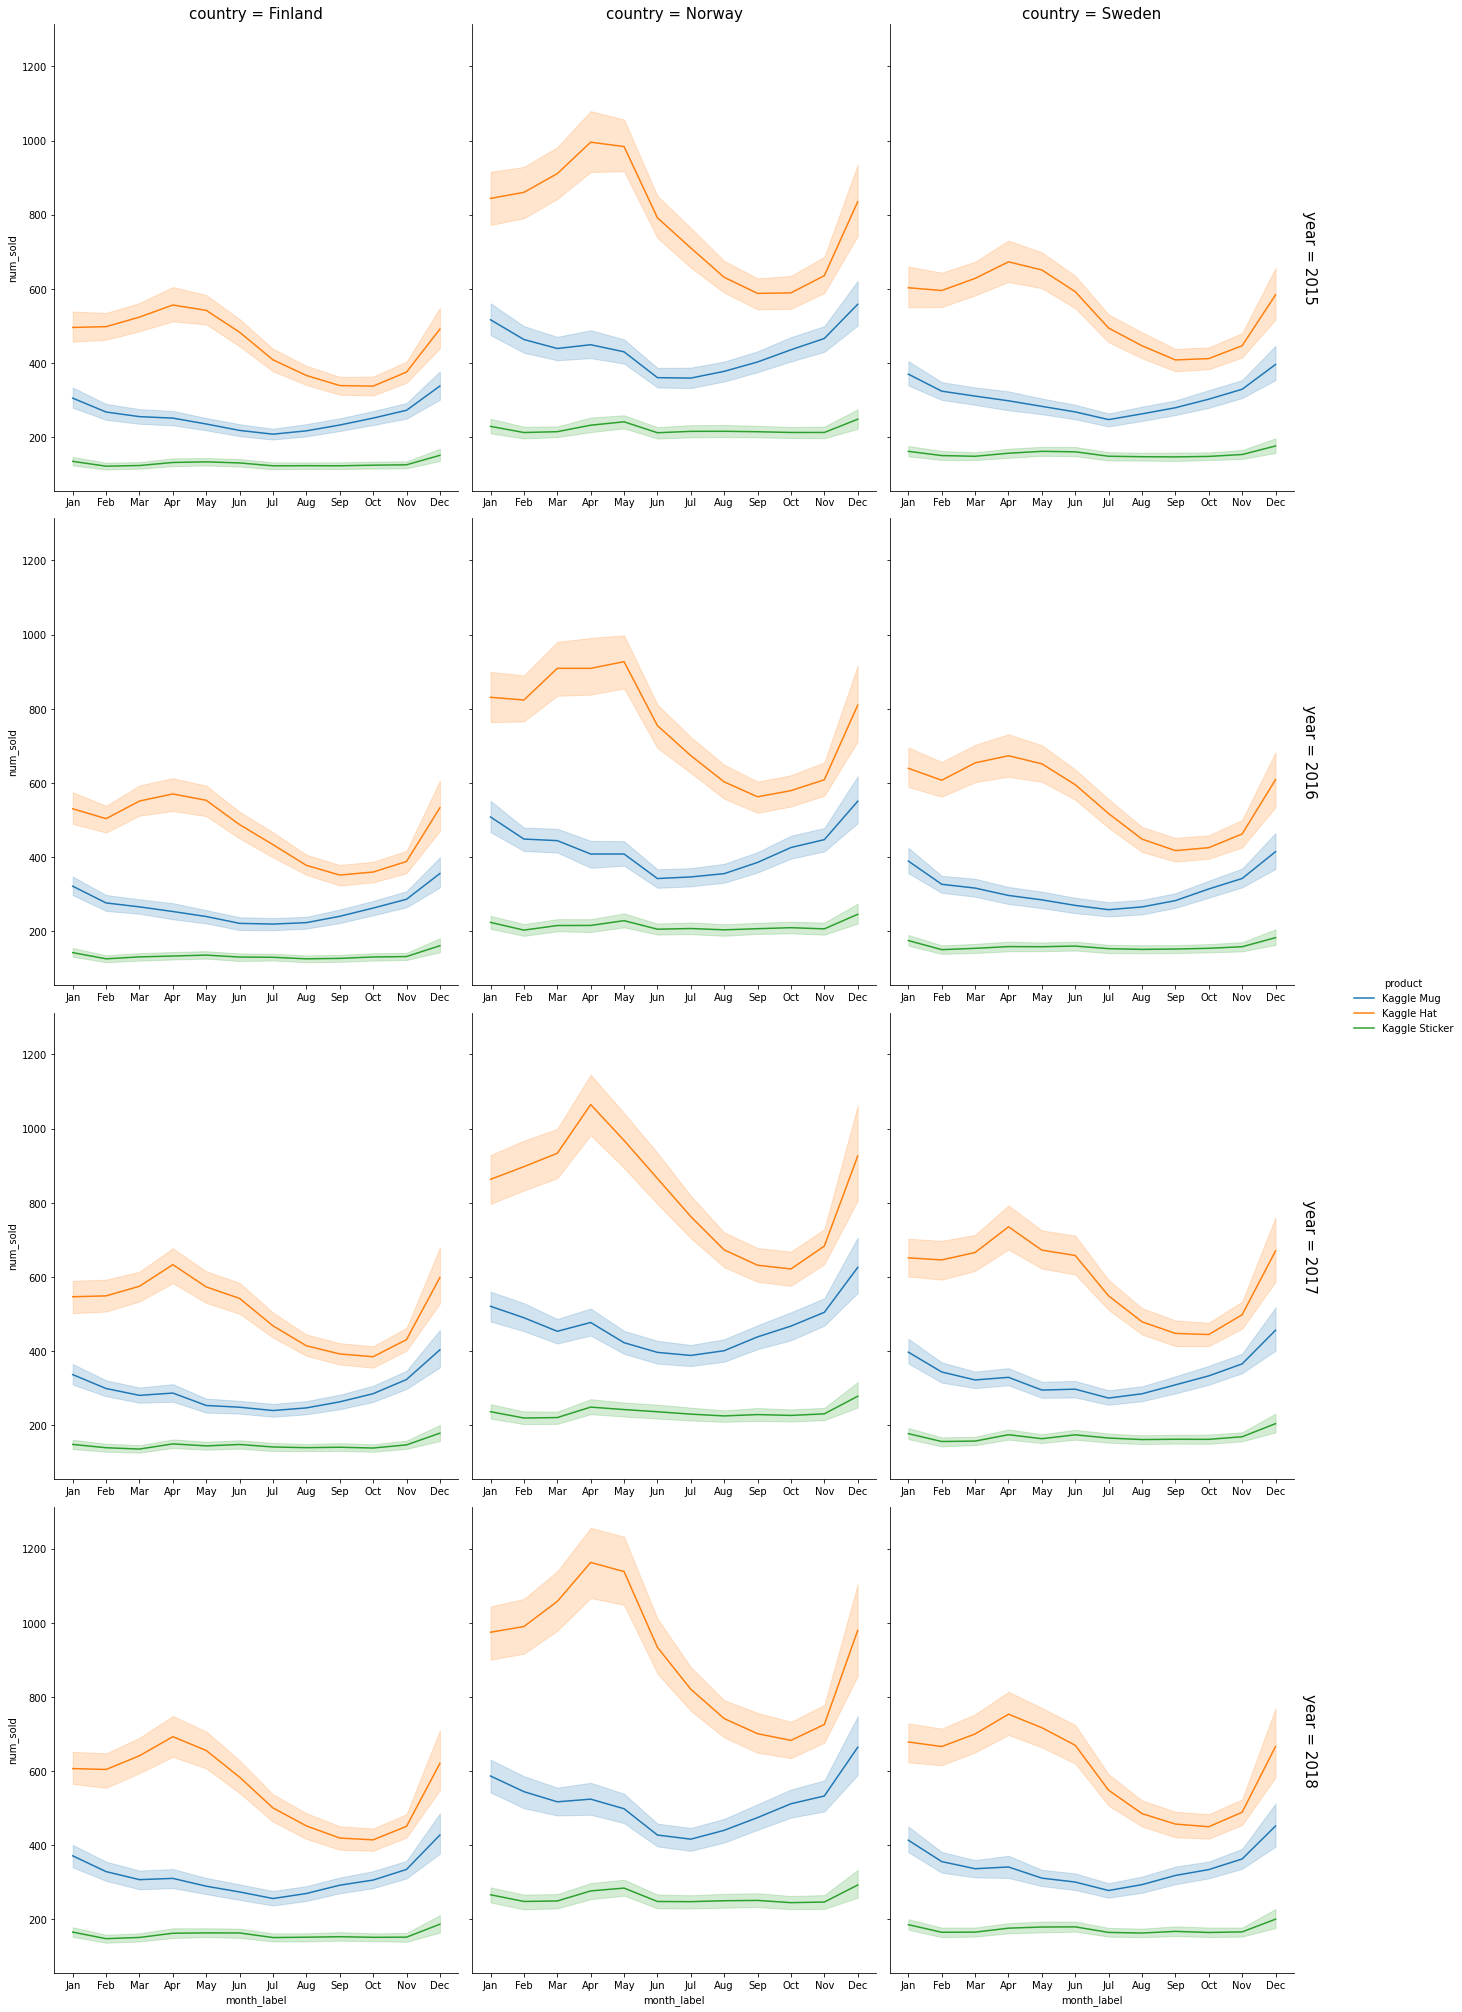

In [140]:
g = sns.FacetGrid(train, col="country", row="year", hue='product',margin_titles=True,height=7,sharex=False,
                  aspect=.9);
g.map_dataframe(sns.lineplot, x="month_label", y="num_sold");
g.set_titles(size=15);
g.add_legend();



#### The above plot explains that every year in the month of April to June and November to December sales are high.

### Let's see how sales are changing over each week of the year and country.

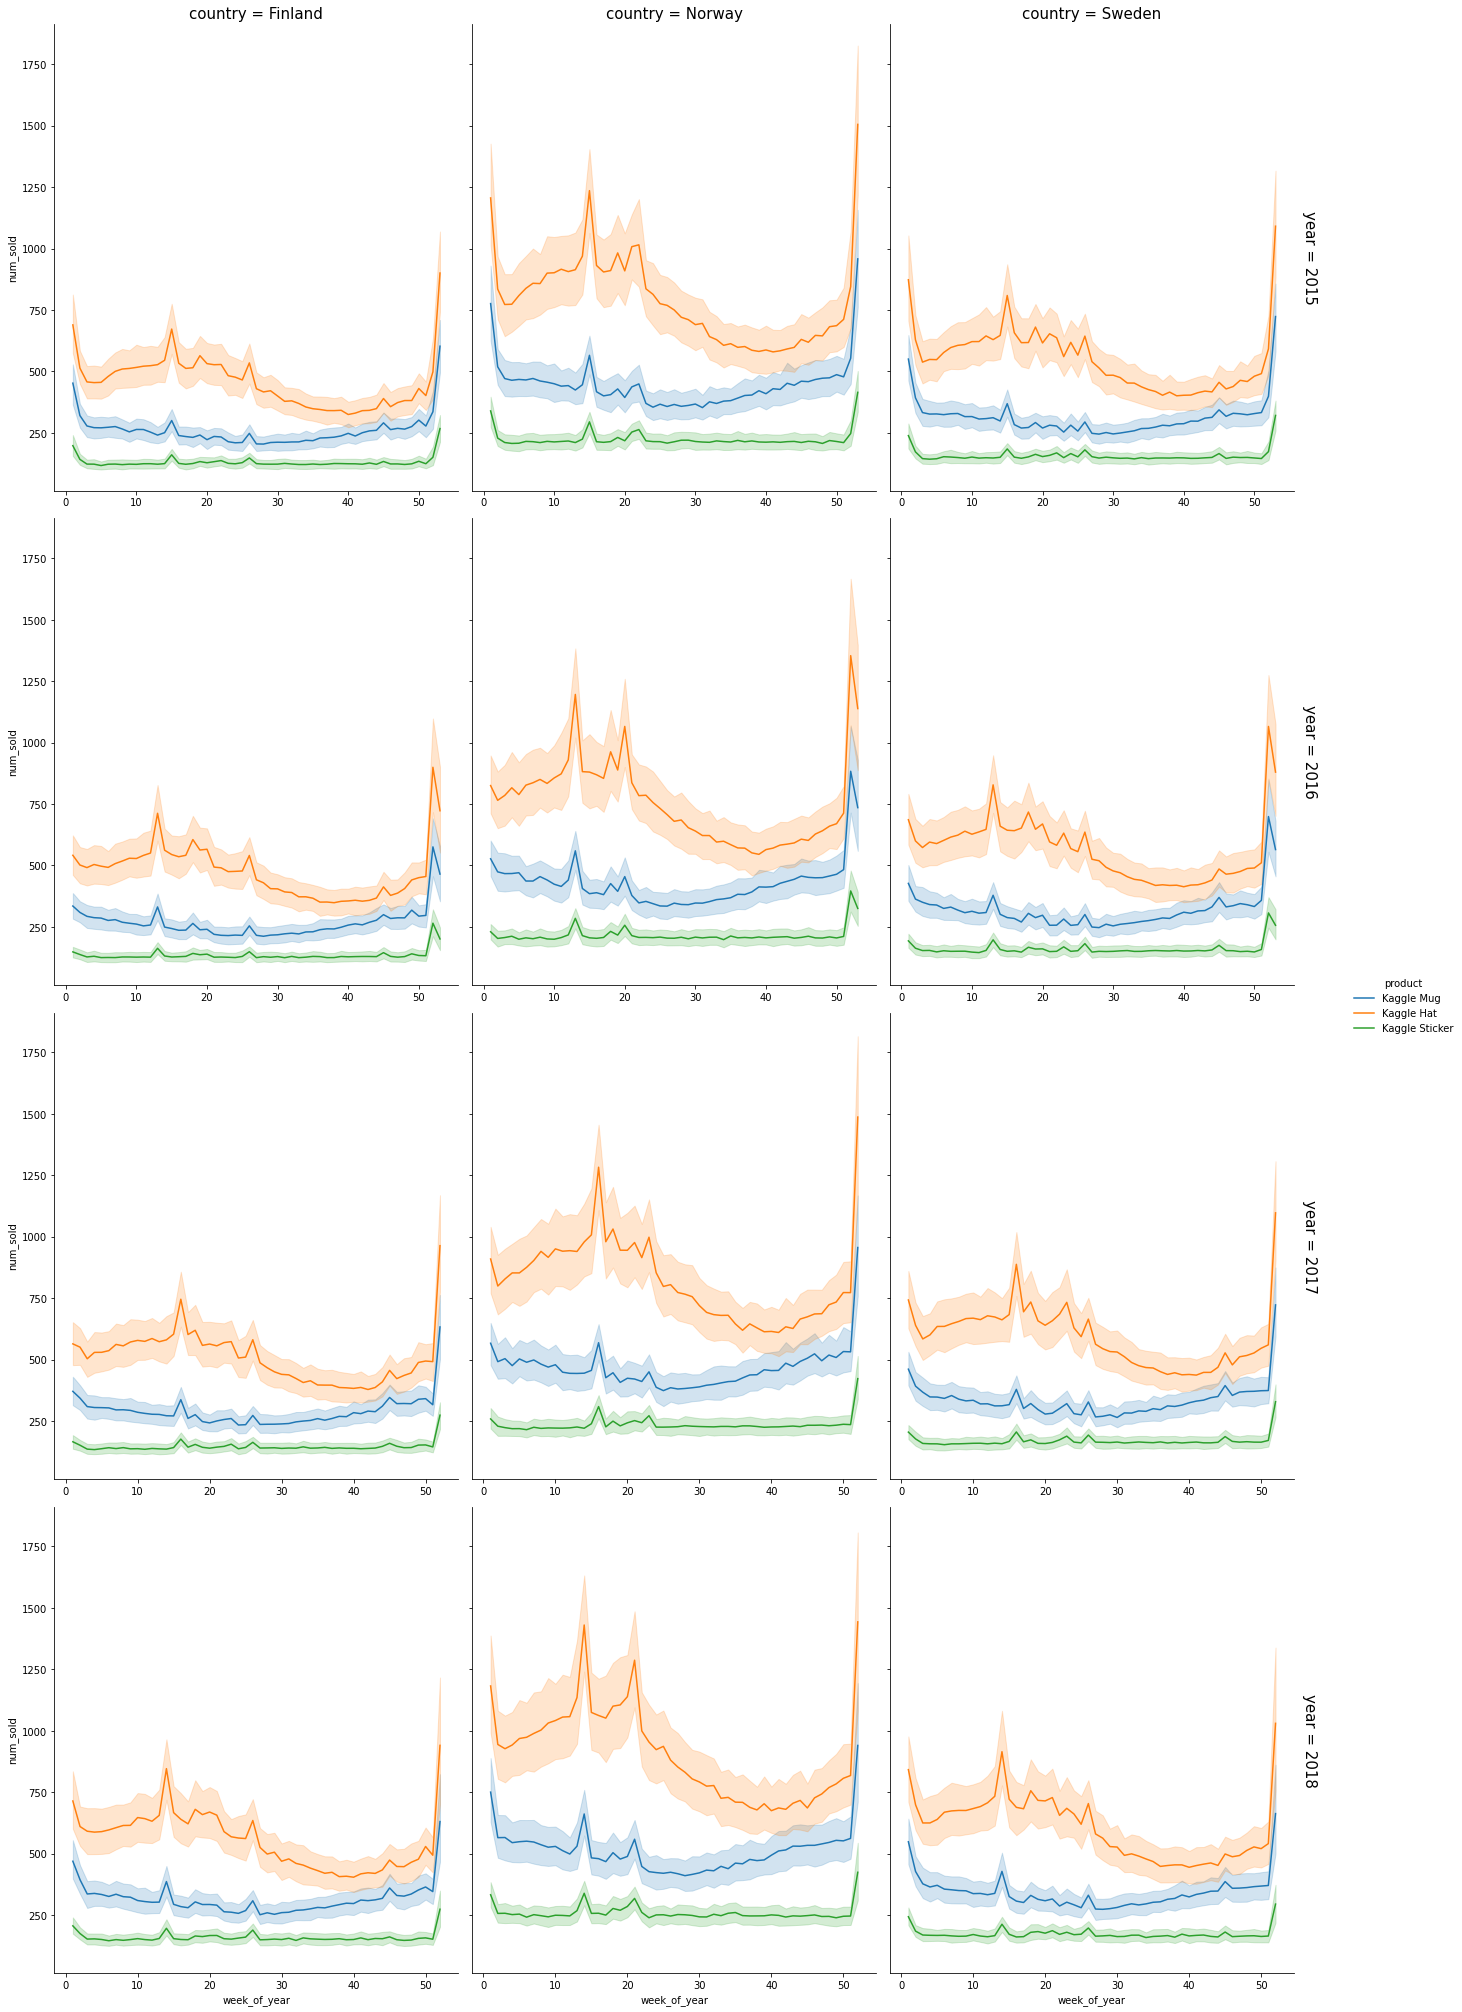

In [142]:
g = sns.FacetGrid(train, col="country", row="year", hue='product',margin_titles=True,height=7,
                  sharex=False,
                  aspect=.9);
g.map_dataframe(sns.lineplot, x="week_of_year", y="num_sold");
g.set_titles(size=15);
g.add_legend();



#### The above plot explains that every year in the week between 10 to 25 and 50 to 52 sales are high.

### Let's see how sales are changing over each day of the week and country.

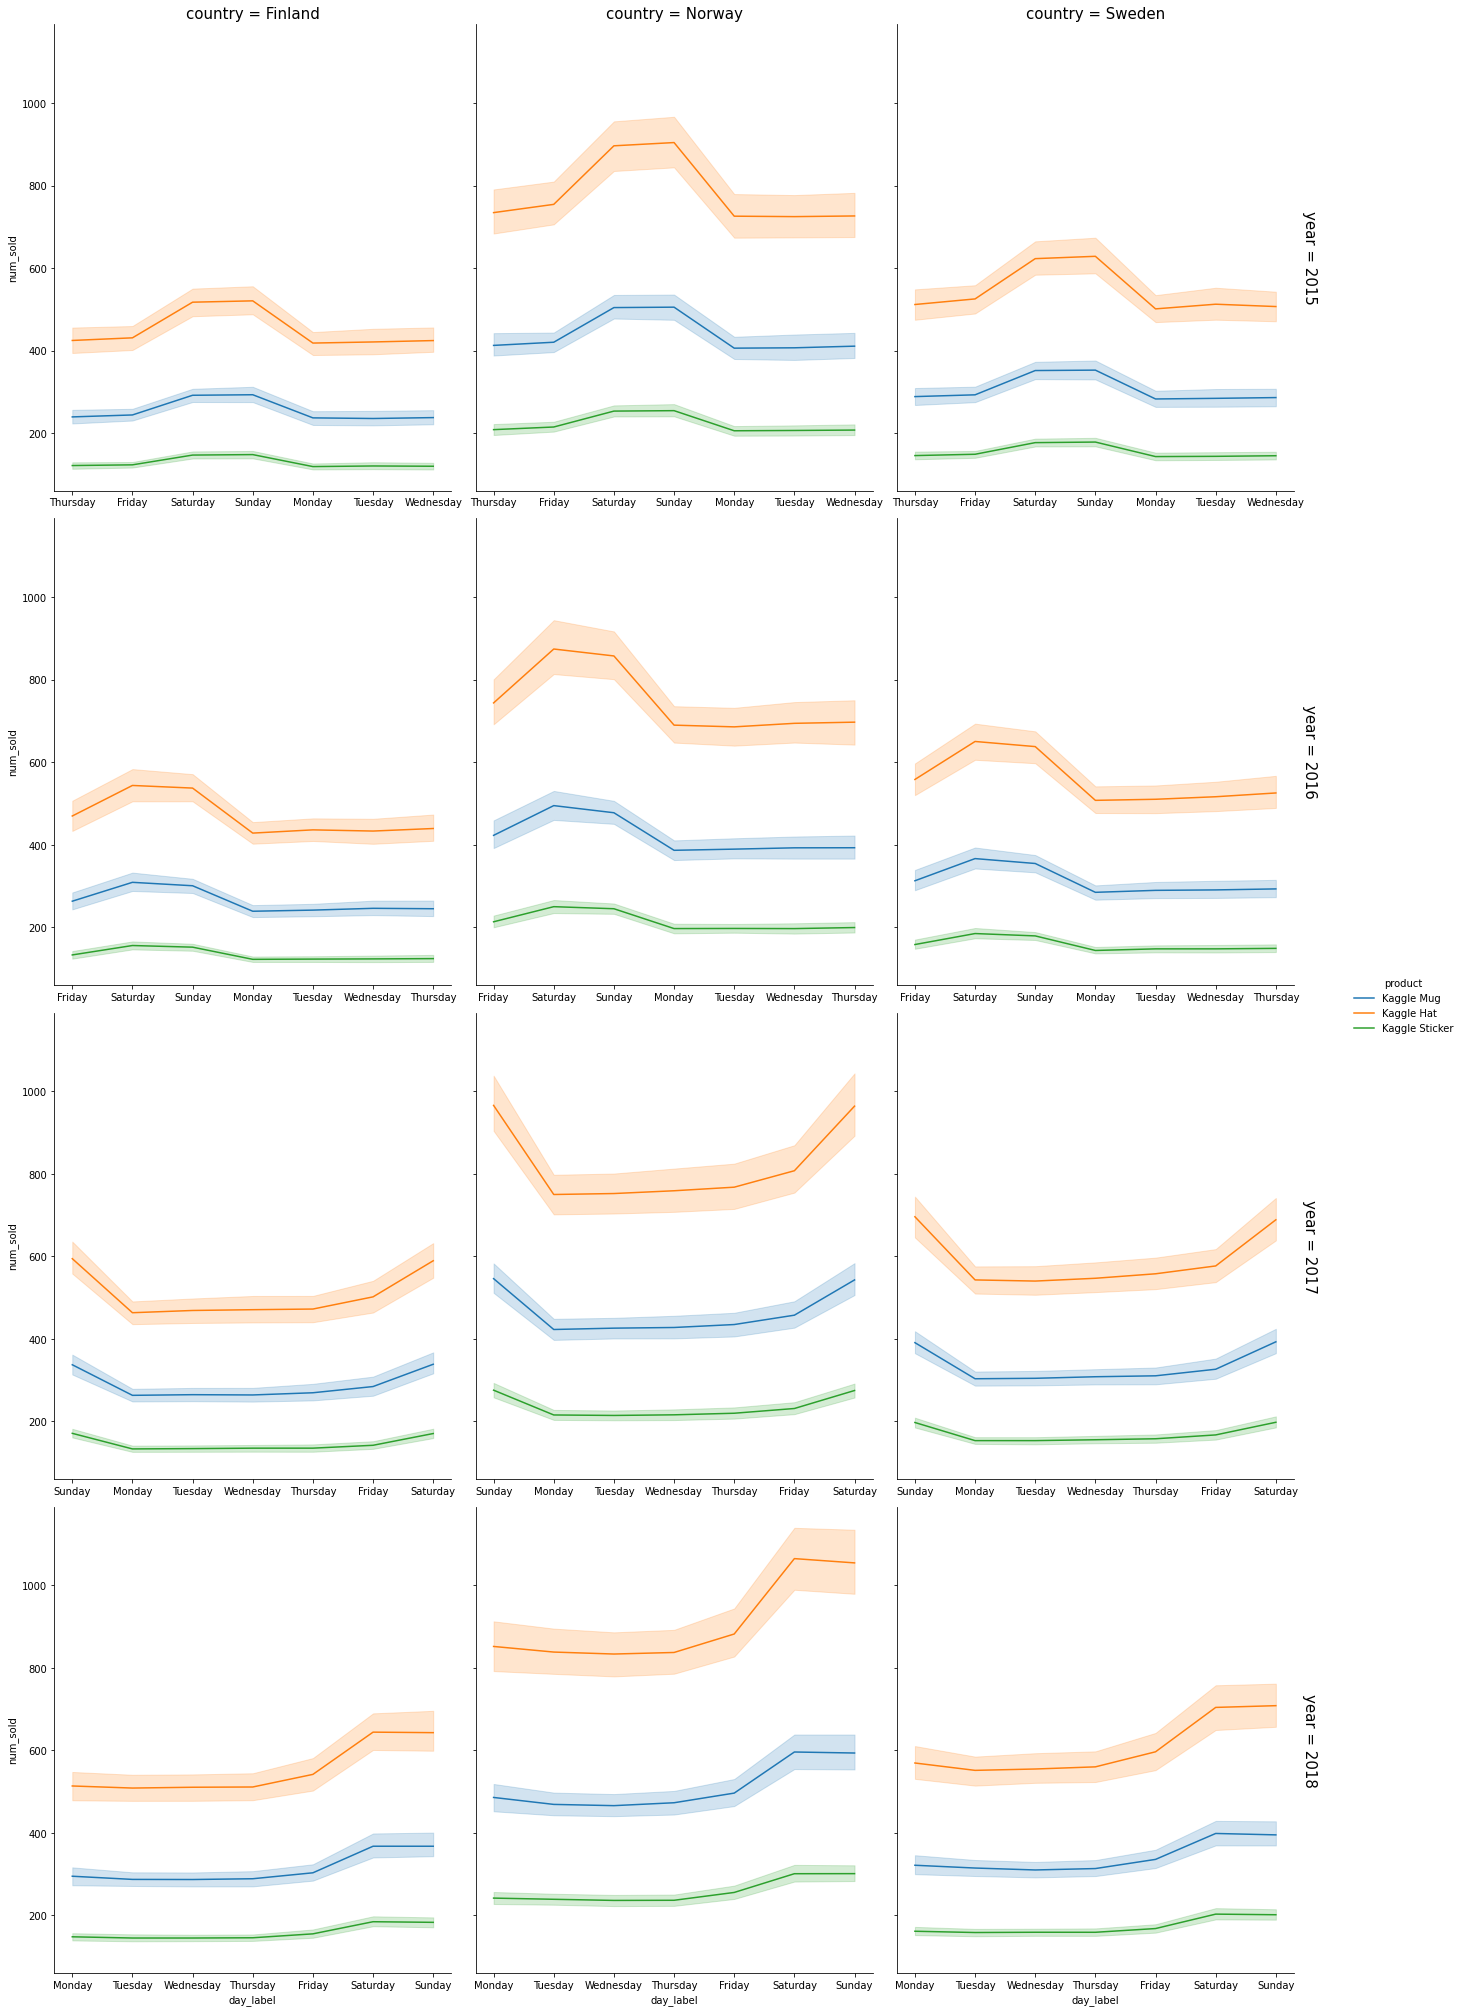

In [137]:
g = sns.FacetGrid(train, col="country", row="year", hue='product',margin_titles=True,height=7,sharex=False,
                  aspect=.9);
g.map_dataframe(sns.lineplot, x="day_label", y="num_sold");
g.set_titles(size=15);
g.add_legend();



#### The above plot explains that the sales are high on the weekend days of each week.

### Let's see how sales are changing over each quarter of the year and country.

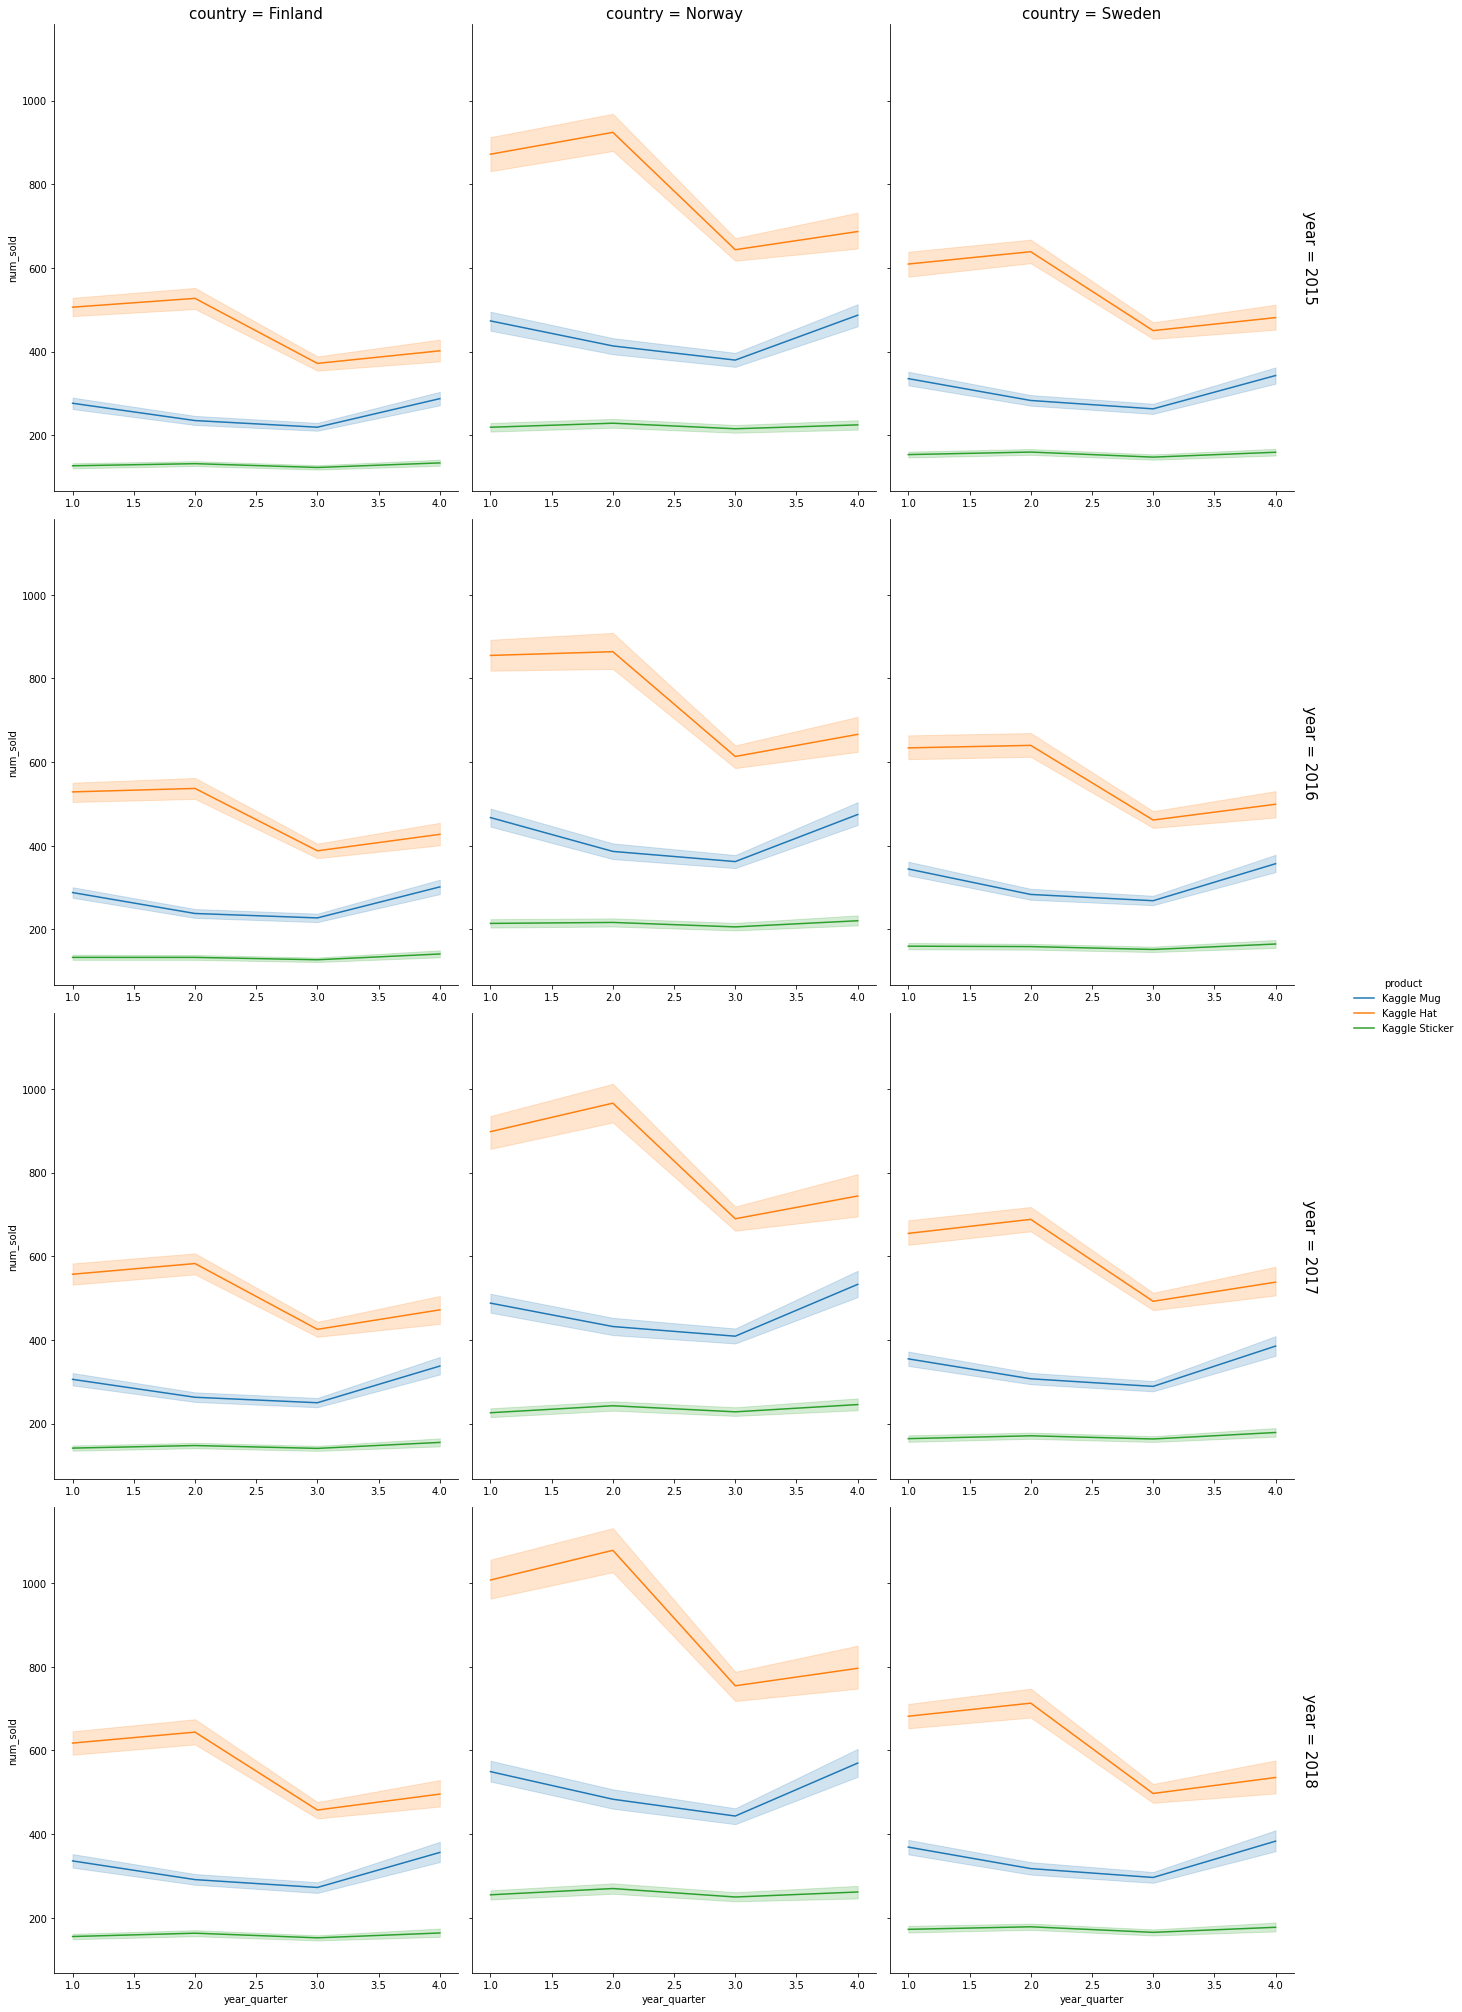

In [138]:
g = sns.FacetGrid(train, col="country", row="year", hue='product',margin_titles=True,height=7,sharex=False,
                  aspect=.9);
g.map_dataframe(sns.lineplot, x="year_quarter", y="num_sold");
g.set_titles(size=15);
g.add_legend();



#### The above plot explains that the sales are high on the 2 and 4 quarters of each year.

In [132]:
train.head(2)

,row_id,date,country,store,product,num_sold,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1,Thursday,3,1,Jan,1,1,2015
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1,Thursday,3,1,Jan,1,1,2015
